# 💬 Exploration 15 Main Project : 챗봇, 넌 내 꺼야! 💬

## 🎯 루브릭 살펴보기 🎯

|루브릭 평가항목|세부기준|
|------|---|
|<span style="color:red">한국어 전처리를 통한 학습 데이터셋이 구축되었는가?</span>|공백과 특수문자 처리, 토크나이징, 병렬 데이터 구축의 과정 등이 적절한 시점에 진행되었는가?|
|<span style="color:blue">구현한 트랜스포머 모델이 한국어 챗봇 모델 학습을 정상적으로 진행하는가?</span>|구현한 트랜스포머 모델이 한국어 병렬 데이터 학습 시 안정적으로 수렴함을 보일 수 있는가?|
|<span style="color:purple">한국어 입력문장에 대해 한국어로 답변하는 함수를 구현하였는가?</span>|한국어로 입력한 문장에 그럴듯한 한국어로 답변이 리턴되었는가?|

## 🎆 프로젝트 순서 (1부) 🎆

1. 챗봇과 친해지기
2. 프로젝트 활용 데이터
3. 필요한 라이브러리 import
4. 데이터 살펴보기

## 1. 챗봇과 친해지기

- 한국어 챗봇을 구현하는 프로젝트 과정을 살펴보기 **전에~ 😄** 먼저 챗봇에 대해 알 수 있는 짧은 영상을 가져왔습니다! ㅎㅎ
- 영상에서 말하는 이의 목소리에.. 녹을지도? 😉😉😉
- 링크 : https://www.youtube.com/watch?v=g_z4WAi6p20
- 대표적으로 **카카오톡의 챗봇 사례**를 들 수 있을 것 같습니다!
- 챗봇은 비교적 간단한 내용을 처리하고, 다소 복잡한 내용은 사람이 처리하는 그런 형태..랄까요! 😄

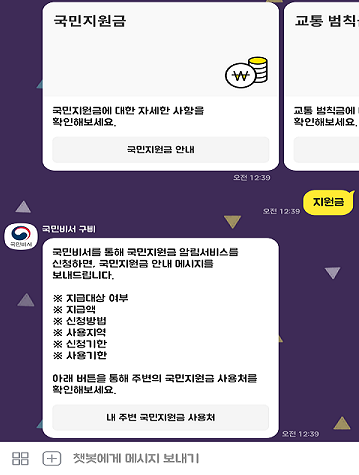

## 2. 프로젝트 활용 데이터

- 시간이 상당히 많이 주어진다면 직접 질문과 답변 라벨을 만들고 하는 것도 좋은 방법입니다.
- 하지만 우리에게는 시간이 제한적이므로 **노드에서 준 송영숙 님의 한국어 챗봇 데이터**를 활용할 것입니다.
- 링크 : https://github.com/songys/Chatbot_data/blob/master/ChatbotData.csv
- AIFFEL의 Cloud Shell에서는 아래 명령어를 입력해 줌으로서 데이터셋을 가져옵니다.

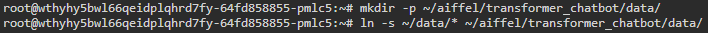

## 3. 필요한 라이브러리 import

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping

print('슈웅~🛸')

슈웅~🛸


## 4. 데이터 살펴보기

- 아래 코드와 같이 데이터의 형태를 확인하고 data의 앞 5개 row만 살펴봅니다.
- Output 결과는 **데이터 프레임으로 출력**되었으며, 11823개의 row와 3개의 column으로 구성되어 있습니다.

In [2]:
data = pd.read_csv(os.getenv('HOME') + '/aiffel/transformer_chatbot/data/KorChatbotData.csv')
print(data.shape)
data.head()

(11823, 3)


,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


- 추가로, 이 데이터셋의 라벨값이 어디까지 있는지를 확인해 보겠습니다.
- Output 결과에 의하면, **라벨값이 2까지 나타나는 것**을 확인할 수 있습니다!

In [3]:
data['label']

0        0
1        0
2        0
3        0
4        0
        ..
11818    2
11819    2
11820    2
11821    2
11822    2
Name: label, Length: 11823, dtype: int64

- 이제 라벨값이 각각 0, 1, 2인 데이터의 개수를 확인해 보겠습니다.
- 5290 + 3570 + 2963 = **11823**
- 따라서 이 데이터셋의 데이터는 **0, 1, 2 중 하나의 값을 라벨값으로 갖습니다! 🤗🤗**

In [4]:
data[data['label'] == 0]

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
5285,힘내야지,응원합니다!,0
5286,힘든 것 좀 끝났으면,다 지나갈 거예요.,0
5287,힘든 시기가 지나갔으면,다 지나갈 거예요.,0
5288,힘든 데도 날 도와준 사람,잊지말고 보답하세요.,0


In [5]:
data[data['label'] == 1]

,Q,A,label
5290,1000일 만난 여자친구와 이별,더 오래 만날 사람 만날 거예요.,1
5291,10년 연애. 헤어졌습니다.,더 공허함이 크시겠네요.,1
5292,10년 연애사 되돌아보니 다 부질없네,더 좋은 사람 만나실 거예요.,1
5293,10년 연예의끝,더 마음이 허하겠어요.,1
5294,10년만나다 헤어지네,충분히 슬퍼하고 충분히 아파하다가 이겨내세요.,1
...,...,...,...
8855,힘듭니다.,어떤 말도 위로가 되지 않겠지만 힘내세요.,1
8856,힘이 될런지 모르겠지만,어떤 말도 위로가 되지 않겠지만 힘내세요.,1
8857,힘이 드네,어떤 말도 위로가 되지 않겠지만 힘내세요.,1
8858,힘이 없어,힘내세요!,1


In [6]:
data[data['label'] == 2]

,Q,A,label
8860,짝사랑만큼 고통스러운 건 없겠지.,짝사랑 만큼 감정소모가 큰 건 없을 거예요.,2
8861,1년 넘게 만났는데 지금도 불타올라,정열적인 사랑을 하고 있나봐요.,2
8862,1년 동거 중인데 계속 좋아,서로 깊게 알게되면서 더 좋아졌나봅니다.,2
8863,1년 동거하고 결혼했어,축하합니다!,2
8864,1년 만났는데도 그 사람에 대해 잘 모르겠어,더 만나보세요.,2
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


- 이상으로 데이터셋까지 모두 살펴보았습니다. 이제 2부로 넘어가서 본격적으로 데이터를 다루어 보겠습니다! 💛💛

## 🎆 프로젝트 순서 (2부) 🎆

- **2부에서는 본격적으로 데이터를 다루어 보고 모델을 구현 및 학습하게 될 것입니다! 🥰🥰**

1. 데이터 전처리
2. SubwordTextEncoder의 사용
3. 트랜스포머 모델 구현을 위한 준비
4. 트랜스포머 모델 구성 및 학습 준비
5. 트랜스포머 모델 학습

## 1. 데이터 전처리

- 우선, 데이터셋에 결측값이 있는지 없는지부터 확인해 보겠습니다.
- 결측값의 개수는 **isna().sum()** 함수를 활용해 찾을 수 있습니다!
- 다행히도 결측값은 없는 것을 확인할 수 있습니다. 😊
- 만약에 혹시라도 결측값이 있다면, **data.dropna(inplace=True)**를 통해 결측값을 제거해주시면 됩니다.

In [7]:
data.isna().sum()

Q        0
A        0
label    0
dtype: int64

In [8]:
## 혹시라도 결측값이 존재한다면 아래의 메소드를 사용하여 결측치를 제거하면 됩니다.
# data.dropna(inplace=True)
# data.isna().sum()

- 이제, 정규 표현식을 활용한 전처리 함수를 만듭니다!

In [9]:
# 전처리 함수
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()

    # 단어와 구두점(punctuation) 사이에 공백을 삽입합니다.
    # 예를 들어서 "I am a pilot." => "I am a pilot ."와 같이
    # pilot과 온점 사이에 공백을 삽입합니다.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)

    # (한글, 알파벳, 숫자 ".", "?", "!", ",")를 제외한 모든 문자를 공백으로 대체합니다.
    sentence = re.sub(r"[^가-힣a-zA-Z0-9?.!,]+", " ", sentence)
    sentence = sentence.strip()
    return sentence

- 지금 우리는, **한국어로 문장을 입력해 주면 그 질문에 대해 답변**해주는 형태의 대화형 챗봇을 만들고 있습니다.
- 따라서 질문과 답변의 쌍으로 이루어진 데이터셋을 구성하기 위해, 아래와 같이 데이터를 로드하는 함수를 만듭니다.
- load_conversations() 함수 안에는 질문과 답변을 각각 구성하는 **inputs**와 **outputs**가 있습니다.
- 데이터셋의 row 개수만큼 input, output 쌍이 반환되는 함수입니다!

In [10]:
def load_conversations():
    inputs, outputs = [], []
    for i in range(len(data)):
        # 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용.
        inputs.append(preprocess_sentence(data['Q'].values[i]))
        outputs.append(preprocess_sentence(data['A'].values[i]))
    return inputs, outputs

- 위 함수를 활용하여 다음과 같이 질문과 답변의 전체 샘플 수를 나타내 보면 다음과 같습니다.

In [11]:
# questions는 inouts에 대응, answers는 outputs에 대응
questions, answers = load_conversations()
print('질문에 대한 전체 샘플 수는', len(questions), '개 입니다.')
print('답변에 대한 전체 샘플 수는', len(answers), '개 입니다.')

질문에 대한 전체 샘플 수는 11823 개 입니다.
답변에 대한 전체 샘플 수는 11823 개 입니다.


- formating을 할 자리에 { }를 넣어주고, format() 함수 안에는 formating을 할 인자를 넣어줍니다.
- **i+1은 { }번째 질문/답변**에 대응되고, **questions[i] 와 answers[i] 는 인덱스 i에 대응되는 문장 즉, i+1번째 문장**을 나타냅니다.

In [12]:
for i in range(5):
    print('전처리 후의 {}번째 질문 샘플: {}'.format(i+1, questions[i]))
    print('전처리 후의 {}번째 답변 샘플: {}'.format(i+1, answers[i]))

전처리 후의 1번째 질문 샘플: 12시 땡 !
전처리 후의 1번째 답변 샘플: 하루가 또 가네요 .
전처리 후의 2번째 질문 샘플: 1지망 학교 떨어졌어
전처리 후의 2번째 답변 샘플: 위로해 드립니다 .
전처리 후의 3번째 질문 샘플: 3박4일 놀러가고 싶다
전처리 후의 3번째 답변 샘플: 여행은 언제나 좋죠 .
전처리 후의 4번째 질문 샘플: 3박4일 정도 놀러가고 싶다
전처리 후의 4번째 답변 샘플: 여행은 언제나 좋죠 .
전처리 후의 5번째 질문 샘플: ppl 심하네
전처리 후의 5번째 답변 샘플: 눈살이 찌푸려지죠 .


## 2. SubwordTextEncoder의 사용

- 프로젝트 가이드에서는 형태소 분석기 대신 내부 단어 토크나이저인 SubWordTextEncoder를 사용할 것을 권했습니다.
- 이에, 이 프로젝트에서는 소개된 가이드대로 **SubWordTextEncoder를 사용**하도록 하겠습니다! 😆😆

### 💛 단어장 생성 💛

- 먼저, 질문과 답변의 쌍으로 구성된 데이터셋에 대한 **단어장을 생성**합니다. (살짝 오래 걸립니다 😢)

In [13]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

- 문장의 시작과 끝을 지정하기 위해서는 **시작 토큰**과 **종료 토큰**이 필요합니다.
- 이에, 아래 코드와 같이 시작 토큰과 종료 토큰에 **고유 정수값을 부여**합니다.

In [14]:
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

- 시작 토큰과 종료 토큰에 부여된 정수값을 확인해 보겠습니다.

In [15]:
print('START_TOKEN의 번호는' ,[tokenizer.vocab_size], '입니다.')
print('END_TOKEN의 번호는' ,[tokenizer.vocab_size + 1], '입니다.')

START_TOKEN의 번호는 [8162] 입니다.
END_TOKEN의 번호는 [8163] 입니다.


- 시작 토큰과 종료 토큰도 출력에 포함되는 점을 고려하여 단어장의 크기를 재산정합니다.

In [16]:
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8164


### 💛 정수 인코딩 💛

- 임의의 샘플에 대해서 **tokenizer.encode()** 를 사용하여 정수 인코딩을 할 수 있습니다.
- Output 결과로 단어별로 정수로 인코딩된 벡터를 출력합니다.
- **questions[n]** 와 **answers[n]** 에서 n의 값을 바꾸어 가며 확인해 보시면 좋습니다! 😄😄

In [17]:
questions[15]

'가만 있어도 땀난다'

In [18]:
answers[15]

'땀을 식혀주세요 .'

In [19]:
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 16번째 질문 샘플 : {}'.format(tokenizer.encode(questions[15])))
print('정수 인코딩 후의 16번째 답변 샘플 : {}'.format(tokenizer.encode(answers[15])))

정수 인코딩 후의 16번째 질문 샘플 : [78, 62, 1143, 5478, 1574]
정수 인코딩 후의 16번째 답변 샘플 : [7386, 452, 1473, 105, 1]


- 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이를 설정합니다.

In [20]:
MAX_LENGTH = 40
print(MAX_LENGTH)

40


- **tokenize_and_filter() 에서는 다음과 같은 작업을 수행합니다.**
1. 정수 인코딩을 하는 과정에서 시작 토큰과 종료 토큰을 앞뒤로 각각 추가
2. 앞에서 설정한 MAX_LENGTH 값을 초과하는 샘플을 제거
3. 앞에서 설정한 MAX_LENGTH 값으로 모든 데이터셋을 패딩

In [21]:
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs

print("함수 Setting 완료!")

함수 Setting 완료!


- 위 과정을 수행한 후의 질문 및 답변 샘플의 개수를 확인해 보겠습니다.
- 놀랍게도 처음의 질문 및 답변 샘플 개수와 똑같은 결과가 나왔습니다!
- 이 말은 **모든 샘플의 MAX_LENGTH가 40 이하**임을 의미합니다. 😄😄😄

In [22]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8164
필터링 후의 질문 샘플 개수: 11823
필터링 후의 답변 샘플 개수: 11823


### 💛 교사 강요(Teacher Forcing) 💛

- **tf.data.Dataset API** : 훈련 프로세스의 속도가 빨라지도록 입력 파이프라인을 구축합니다.
- 테스트 과정에서 t 시점의 출력이 다음 시점인 t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용합니다.
- 이 때, t+1 시점의 입력이 되는 것은 모델이 t 시점에서 예측한 값이 아닌 **실제 정답**입니다.
- 교사 강요 기법을 사용함으로서, 잘못된 예측이 다음 스텝의 입력에 들어가 예측의 정확도를 떨어뜨리는 상황을 해결할 수 있게 합니다.
- 링크 : https://wikidocs.net/46496

- 질문과 답변의 쌍을 tf.data.Dataset API의 입력으로 받아들여 파이프라인을 구성합니다.
- **answers[:, :-1]** 을 디코더의 입력값, **answers[:, 1:]** 을 디코더의 레이블로 사용합니다. (**Why? 😅**)
- 디코더는 이전에 구한 target을 다음 input로 사용해야 하므로, 디코더의 입력은 마지막 데이터 전까지로 설정하기 위해 -1을 넣었습니다.
- 디코더의 레이블 또한 위와 같은 흐름으로 START_TOKEN을 제거해줍니다. START_TOKEN은 0에 해당하므로 1을 넣었습니다.

In [23]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

## 3. 트랜스포머 모델 구현을 위한 준비

- 우선 트랜스포머 모델을 구현하기 위해서는 인코더, 디코더, 마스킹, 어텐션 등의 정의가 필요합니다.
- 트랜스포머 모델을 구현하기 위해 다음과 같이 준비합니다.

### 💙 포지셔널 인코딩 레이어 💙

In [24]:
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("포지셔널 인코딩 레이어 클래스가 정의되었다!")

포지셔널 인코딩 레이어 클래스가 정의되었다!


### 💙 스케일 닷 프로덕트 어텐션 💙

In [25]:
def scaled_dot_product_attention(query, key, value, mask):
  """어텐션 가중치를 계산. """
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # scale matmul_qk
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # add the mask to zero out padding tokens
  if mask is not None:
    logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  output = tf.matmul(attention_weights, value)

  return output
print("스케일 닷 프로덕트 어텐션 함수가 정의되었다!")

스케일 닷 프로덕트 어텐션 함수가 정의되었다!


### 💙 머리가 여러 개인 멀티 헤드 어텐션 💙

In [26]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # linear layers
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다.
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷-프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다.
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # final linear layer
    outputs = self.dense(concat_attention)

    return outputs
print("멀티 헤드 어텐션 클래스가 정의되었다!")

멀티 헤드 어텐션 클래스가 정의되었다!


### 💙 마스킹 레이어 구성 💙

- 패딩 마스킹 함수를 구현하도록 하겠습니다.
- **자연어 처리에서의 패딩**이란 모든 문장의 길이를 동일하게 맞춰주는 역할을 합니다.
- 정해 준 길이보다 짧은 문장의 경우에는 그 차이만큼 숫자 0을 채워서 문장의 길이를 맞추는 전처리 방법입니다.
- 그런데 숫자 0은 실제로 의미가 없기 때문에 실제 연산에서는 제외 처리를 합니다.
- 패딩 마스킹은 **숫자가 0인 위치를 체크**해 주는 역할을 합니다! 😊😊

In [27]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("패딩 마스킹 함수가 정의되었다!")

패딩 마스킹 함수가 정의되었다!


- 우리가 원하는 것은 **이전의 단어들로부터 다음 단어들을 예측**하는 훈련을 제대로 하는 것입니다!
- **look ahead** 마스킹 기법은 자신보다 다음에 나올 단어를 참고하지 않도록 가리는 기법을 말하며, 아래 그림의 빨간색 영역과 관련있습니다.
- 예를 들어 Query 단어가 '행복을' 이라고 한다면, '행복을' 열까지만 보이고 나머지는 모두 가려진 빨간색 영역에 해당합니다.
- 참고 : https://www.youtube.com/watch?v=xhY7m8QVKjo

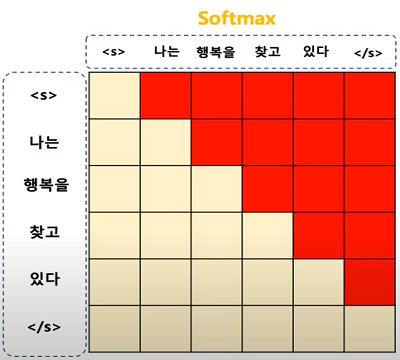

- 아래는 빨간색 영역 즉, look ahead 마스킹 기법을 적용하기 위한 함수를 구현한 것입니다.

In [28]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("룩 어헤드 마스킹 함수가 정의되었다!")

룩 어헤드 마스킹 함수가 정의되었다!


### 💙 인코더 💙

- 트랜스포머 모델에서 하나의 Encoder 층은 크게 **Self Attention**과 **Feed Forward 신경망**으로 총 2개의 서브 층으로 나뉩니다.
- 참고 : http://jalammar.github.io/illustrated-transformer/
- 아래는 2개의 서브 층을 가지는 하나의 인코더 레이어를 함수로 구현한 것입니다.

In [29]:
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션) - 병렬적으로 수행합니다!
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

print('인코더 레이어 함수가 정의되었다!')

인코더 레이어 함수가 정의되었다!


- 임베딩 층과 포지셔널 인코딩 층을 연결하고, 원하는 만큼 인코딩 층을 쌓아주면 트랜스포머의 인코더가 됩니다.
- 인코더와 디코더 내부에서는 각 서브 층을 거친 이후에 훈련을 돕는 **Layer Normalization** 기법이 사용되었습니다.
- 참고 : http://jalammar.github.io/illustrated-transformer/

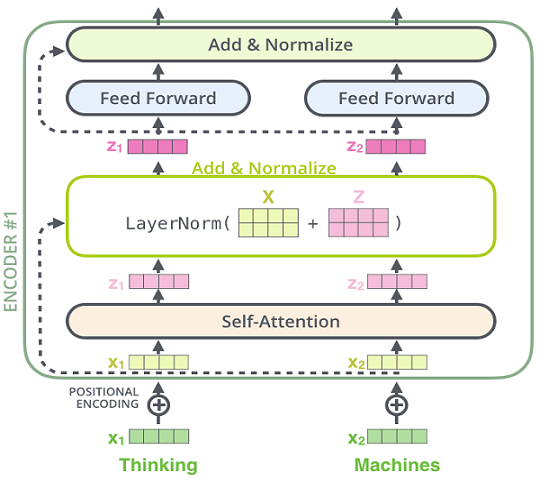

- encoder() 함수의 인자 중 **num_layers는 하이퍼 파라미터**인데, 해당 개수만큼 인코더 층을 쌓게 됩니다.
- 아래 코드는 전체 인코더 함수를 구현한 것입니다! 😉😉

In [30]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("트랜스포머 인코더 함수가 정의되었다!")

트랜스포머 인코더 함수가 정의되었다!


### 💙 디코더 💙

- 앞에서 하나의 인코더 레이어는 2개의 서브 층으로 구성되어 있었죠? (넹!)
- 반면 **하나의 디코더 레이어에는 총 3개의 서브 층**으로 구성되어 있습니다.
- 기존에 Self-Attention과 Feed Forward 신경망에 **Encoder-Decoder Attention 층**이 있다는 점이 다른 점이네요!
- **Encoder-Decoder Attention**은 인코더가 입력 문장으로부터 정보를 디코더에 전달하는 역할을 합니다.
- 참고 : http://jalammar.github.io/illustrated-transformer/

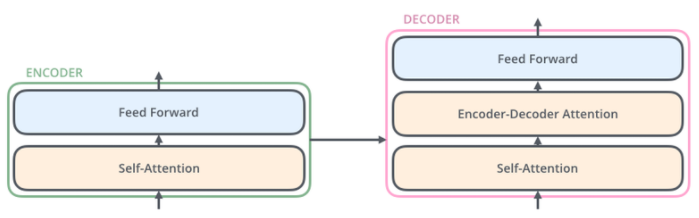

- 아래 코드는 하나의 디코더 레이어를 함수로 구현한 것입니다.

In [31]:
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

print("디코더 레이어 함수가 정의되었다!")

디코더 레이어 함수가 정의되었다!


- 임베딩 층과 포지셔널 인코딩 층을 연결하고, 원하는 만큼 디코더 층을 쌓아주면 트랜스포머의 디코더가 됩니다.
- 인코더에서와 마찬가지로 num_layers 수만큼 디코더 층을 쌓게 됩니다.

In [32]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

print("트랜스포머 디코더 함수가 정의되었다!")

트랜스포머 디코더 함수가 정의되었다!


- 여기까지 클래스 및 함수가 잘 정의되었다면, 트랜스포머 모델을 구현할 준비는 모두 마쳤습니다! 😍😍😍

## 4. 트랜스포머 모델 구성 및 학습 준비

### 💚 트랜스포머 모델 구성 💚

- 지금까지 정의된 함수를 활용하여 트랜스포머 함수를 정의합니다.

In [33]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

print("트랜스포머 함수가 정의되었습니다! 👏👏👏")

트랜스포머 함수가 정의되었습니다! 👏👏👏


### 💚 트랜스포머 모델 학습 준비 💚

- **다음 몇 개의 과정은 모델의 본격적인 훈련을 위한 준비에 해당합니다.**
1. 모델 생성
2. 손실 함수 (Loss function)
3. 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)

#### 🎈 1단계. 모델 생성 🎈

- 사용자가 정할 수 있는 하이퍼파라미터 값을 적용하여 트랜스포머 모델을 생성합니다!

In [34]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.005 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3144192     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

#### 🎈 2단계. 손실 함수(Loss function) 🎈

- 레이블인 시퀀스에 패딩이 되어 있어서 loss 계산 시에 패딩 마스크를 적용합니다.

In [35]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("손실 함수가 정의되었습니다! 👍👍")

손실 함수가 정의되었습니다! 👍👍


#### 🎈 3단계. 커스텀 학습률 스케줄링(Custom Learning rate Scheduling) - 줄여서 CLRS라고 하겠습니다! 🎈 

- 딥러닝 모델을 학습할 때 **학습률**은 매우 중요한 하이퍼 파라미터로 작용합니다.
- **CLRS**는 최근에 널리 사용된 기법으로 모델 학습 초기에 학습률을 급격히 높였다가, train step 진행에 따라 서서히 그 값을 낮춰가면서 안정적으로 수렴하게 만듭니다.

In [36]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("CLRS 클래스가 정의되었습니다! 😆😆")

CLRS 클래스가 정의되었습니다! 😆😆


- 내친김에 커스텀 학습률 스케줄링 계획을 시각화도 해 보겠습니다.
- 아래 코드를 돌려보면, train step이 대충 10000회 정도쯤까지는 학습률이 증가하다가, 이후로는 감소하는 흐름을 보입니다.

Text(0.5, 0, 'Train Step')

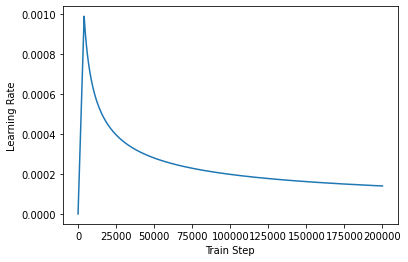

In [37]:
sample_learning_rate = CustomSchedule(d_model=256)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

### 💚 모델 컴파일하기 💚

- 위에서 정의한 손실함수와 CLRS를 사용하여 모델을 컴파일링 합니다.

In [38]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.8, beta_2=0.9, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("모델 컴파일이 성공적입니다~! 👏👏")

모델 컴파일이 성공적입니다~! 👏👏


## 5. 트랜스포머 모델 학습

- 여기까지 오느라 고생하셨습니다! 이제 트랜스포머 모델을 학습시켜 보도록 하겠습니다!
- 프로젝트 1부에서 import 했던 **EarlyStopping** 기법을 사용해서 일정 epochs 학습시킵니다.

In [39]:
EPOCHS = 50
early_stop = EarlyStopping(monitor='accuracy', patience=2)
history = model.fit(dataset, epochs=EPOCHS, verbose=1, callbacks=early_stop)

Epoch 1/50
185/185 [==============================] - 31s 128ms/step - loss: 1.5097 - accuracy: 0.0183
Epoch 2/50
185/185 [==============================] - 23s 121ms/step - loss: 1.2054 - accuracy: 0.0495
Epoch 3/50
185/185 [==============================] - 24s 130ms/step - loss: 1.0018 - accuracy: 0.0509
Epoch 4/50
185/185 [==============================] - 23s 122ms/step - loss: 0.9051 - accuracy: 0.0552
Epoch 5/50
185/185 [==============================] - 24s 128ms/step - loss: 0.8489 - accuracy: 0.0593
Epoch 6/50
185/185 [==============================] - 22s 119ms/step - loss: 0.7962 - accuracy: 0.0646
Epoch 7/50
185/185 [==============================] - 21s 115ms/step - loss: 0.7226 - accuracy: 0.0716
Epoch 8/50
185/185 [==============================] - 21s 115ms/step - loss: 0.6526 - accuracy: 0.0823
Epoch 9/50
185/185 [==============================] - 22s 116ms/step - loss: 0.5681 - accuracy: 0.0937
Epoch 10/50
185/185 [==============================] - 22s 117ms/step - l

- 이제 loss와 accuracy를 시각화해 봅니다.

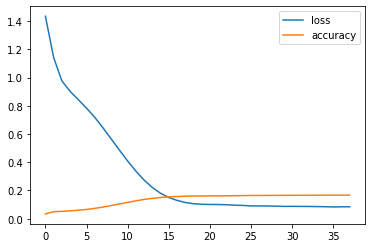

In [40]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

## 🎆 프로젝트 순서 (3부) 🎆

- **3부는 챗봇에게 입력을 주어 직접 답변을 받아보는 시뮬레이션을 수행해 보고, 더욱 의미 있는 답변을 리턴하기 위한 시도를 해본 뒤, 프로젝트를 회고하며 마무리하는 과정을 담았습니다.**
1. 특명 A : 내가 챗봇에게 말을 걸어보다니!
2. 특명 B : 의미 있는 답변을 리턴받기 위한 시도들
3. 프로젝트 회고

## 1. 특명 A : 내가 챗봇에게 말을 걸어보다니!

- 챗봇에게 말을 걸기 위한 과정을 살펴봅니다.
- **예측(inference) 단계에서의 흐름은 아래와 같습니다!**
1. 새로운 입력 문장에 대해서는 훈련 때와 동일한 전처리 과정을 거칩니다.
2. 입력 문장은 Tokenizing 하고, 시작 토큰과 종료 토큰을 추가해줍니다.
3. 마스킹 계산을 수행합니다. (패딩 마스킹, look ahead 마스킹)
4. 디코더는 입력 시퀀스로부터 다음 단어를 예측하게 됩니다.
5. 이렇게 예측된 다음 단어를 기존의 입력 시퀀스에 추가하여 새로운 입력으로 사용합니다.
6. 문장이 MAX_LENGTH에 도달하거나, END_TOKEN이 예측되면 디코더의 동작을 멈추도록 합니다.

In [41]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)

print("디코더 예측 함수가 정의되었습니다~😉")

디코더 예측 함수가 정의되었습니다~😉


- 임의의 입력 문장에 대해서, 앞에서 만든 디코더 예측 함수를 호출하여 답변을 얻는 함수를 만듭니다.

In [42]:
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('어둠의 개발자 : {}'.format(sentence))
  print('챗봇 : {}'.format(predicted_sentence))

  return predicted_sentence

print("챗봇에게 말을 걸 준비가 완료되었습니다!")

챗봇에게 말을 걸 준비가 완료되었습니다!


- **자, 이제 모든 준비가 끝났습니다. 챗봇에게 말을 걸어보겠습니다!!! 😍😍**
- **초기에 사용했던 파라미터들은 아래와 같습니다.**
1. NUM_LAYERS = 2
2. D_MODEL = 256
3. NUM_HEADS = 8
4. UNITS = 512
5. DROPOUT = 0.1
6. Adam 모델에서 learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9

- 아래는 여러 번의 시도로 인해 결과가 계속 변할 수 있습니다.

In [43]:
sentence_generation('안녕하세요')

어둠의 개발자 : 안녕하세요
챗봇 : 안녕하세요 .


'안녕하세요 .'

In [44]:
sentence_generation('사랑이 무엇일까요?')

어둠의 개발자 : 사랑이 무엇일까요?
챗봇 : 당신의 마음을 전해보세요 .


'당신의 마음을 전해보세요 .'

In [45]:
sentence_generation('자기소개 해주세요')

어둠의 개발자 : 자기소개 해주세요
챗봇 : 서로 마음이 슬픈 이야기네요 .


'서로 마음이 슬픈 이야기네요 .'

In [46]:
sentence_generation('날씨가 참 좋네요')

어둠의 개발자 : 날씨가 참 좋네요
챗봇 : 그래도 웃어 보아요 .


'그래도 웃어 보아요 .'

In [47]:
sentence_generation('행복했으면 좋겠어요')

어둠의 개발자 : 행복했으면 좋겠어요
챗봇 : 그렇게 될 수 있을 거예요 .


'그렇게 될 수 있을 거예요 .'

- 챗봇과 대화해 본 결과, 질문에 예상되는 답변과는 다른 답변을 리턴한 경우가 많았습니다.
- 이제 파라미터들을 조작하면서 전보다 더 좋은 챗봇을 만들기 위한 시도를 해 보겠습니다! 생각만 해도 재미있지 않을까요~ 🤗🤗

## 2. 특명 B : 의미 있는 답변을 리턴받기 위한 시도들

- 예측 모델의 정확도가 높다면 챗봇이 더 좋은 방향으로 업데이트될 수도 있지 않을까요?
- 지금부터 처음에 작업했던 accuracy보다 더 높은 accuracy를 얻어서 의미 있는 답변을 리턴하기 위한 여정을 시작해 봅니다!
- 모든 과정에서 Early Stop을 추가하여 학습시간에 있어서 효율을 가지게 하고자 합니다.

### 💎 1번째 시도 💎

- **사용한 파라미터 내역입니다.**
- **1번째 시도에서는 기존에 했던 시도에서 인코더와 디코더의 층 수를 하나 늘렸습니다.**
1. NUM_LAYERS = 3
2. D_MODEL = 256
3. NUM_HEADS = 8
4. UNITS = 512
5. DROPOUT = 0.1
6. Adam 모델에서 learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9
7. EPOCHS = 50

- 네.. 망했습니다 ㅋㅋ 💦💦

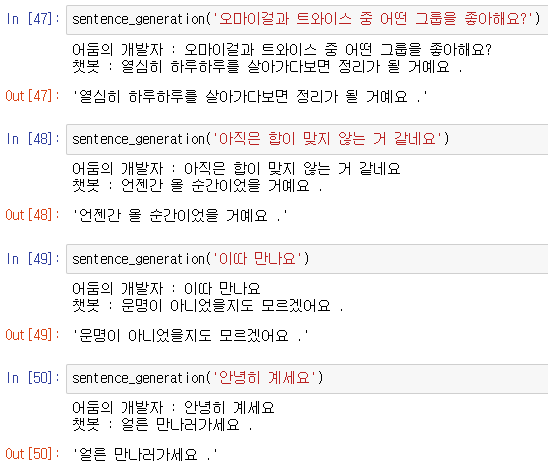

### 💎 2번째 시도 💎

- **사용한 파라미터 내역입니다.**
- **2번째 시도에서는 D_MODEL의 값을 2배로 늘리고, Adam 모델의 파라미터들을 조정했습니다.**
- **또한, 질문 내용도 몇 개 변경했습니다!**
1. NUM_LAYERS = 2
2. D_MODEL = 512
3. NUM_HEADS = 8
4. UNITS = 512
5. DROPOUT = 0.1
6. Adam 모델에서 learning_rate, beta_1=0.95, beta_2=0.99, epsilon=1e-9
7. EPOCHS = 50

- 1번째 시도보다 의미 있는 답변을 내놓은 것 같습니다! 👍👍

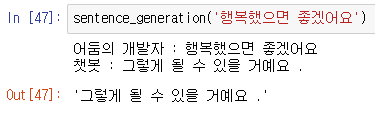

### 💎 3번째 시도 💎

- **사용한 파라미터 내역입니다.**
- **3번째 시도에서는 2번째 시도 상황에서 DROPOUT의 값만 5배 작게 조정했습니다.**
1. NUM_LAYERS = 2
2. D_MODEL = 512
3. NUM_HEADS = 8
4. UNITS = 512
5. DROPOUT = 0.02
6. Adam 모델에서 learning_rate, beta_1=0.95, beta_2=0.99, epsilon=1e-9
7. EPOCHS = 50

- 2번째 시도에 비하여 의미 있는 답변을 내놓은 Q/A 세트는 없었던 것 같습니다.. 😢😢
- 15 epoch에서 accuracy 0.1714로 Early Stop

### 💎 4번째 시도 💎

- **사용한 파라미터 내역입니다.**
- **4번째 시도에서는 2번째 시도 상황에서 DROPOUT의 값(0.1)을 2배 작게 하고 Adam 모델의 파라미터를 조정했습니다.**
1. NUM_LAYERS = 2
2. D_MODEL = 512
3. NUM_HEADS = 8
4. UNITS = 512
5. DROPOUT = 0.05
6. Adam 모델에서 learning_rate, beta_1=0.99, beta_2=0.98, epsilon=1e-9
7. EPOCHS = 50

- 2번째 시도와 다소 비슷한 결과인 것 같습니다.
- 21 epoch에서 0.1686으로 Early Stop

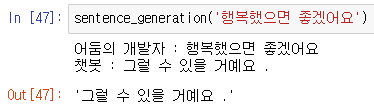

### 💎 5번째 시도 💎

- **사용한 파라미터 내역입니다.**
- **5번째 시도에서는 2번째 시도 상황에서 Adam 모델의 beta_2 값을 감소시키고 인코더 / 디코더 레이어의 수를 하나 늘렸습니다.**
- **또한, 질문 내용도 몇 개 변경했습니다!**
1. NUM_LAYERS = 3
2. D_MODEL = 512
3. NUM_HEADS = 8
4. UNITS = 512
5. DROPOUT = 0.1
6. Adam 모델에서 learning_rate, beta_1=0.95, beta_2=0.9, epsilon=1e-9
7. EPOCHS = 50

- 모든 시도를 통틀어 **처음으로 이상한 문자가 포함된 답변이 나왔다.** (충격💥)
- 21 epoch에서 accuracy 0.1643으로 Early Stop

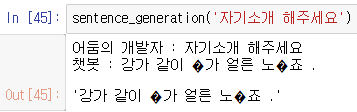

### 💎 6번째 시도 💎

- **사용한 파라미터 내역입니다.**
- **6번째 시도에서는 target_vocab_size의 크기를 더 키웠습니다.**
- **이러한 시도를 하는 이유는 혹시 단어 리스트가 많다면 더 좋은 단어를 선택할 수도 있지 않을까 생각하여 시도하였습니다!**
- **또한, 질문 내용도 몇 개 변경했습니다!**
1. NUM_LAYERS = 2
2. D_MODEL = 512
3. NUM_HEADS = 8
4. UNITS = 512
5. DROPOUT = 0.1
6. Adam 모델에서 learning_rate, beta_1=0.95, beta_2=0.9, epsilon=1e-9
7. EPOCHS = 50
8. target_vocab_size 크기 2의 13제곱에서 2의 14제곱으로 변경

- 챗봇이 이전의 시도들보다 더 긴 답변을 하기도 했습니다. 하지만 조금은 아쉬운 문장이네요😅
- 22 epoch에서 accuracy 0.1427로 Early Stop

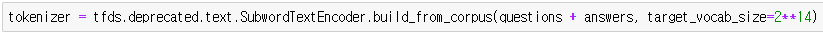

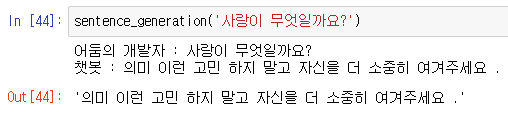

### 💎 7번째 시도 💎

- **사용한 파라미터 내역입니다.**
- **7번째 시도에서는 target_vocab_size의 크기를 더 줄였습니다.**
- **6번째 시도에서 크기를 2번째 시도 때보다 늘렸던 것처럼, 반대로 크기를 줄여서도 시도해 보았습니다.**
1. NUM_LAYERS = 2
2. D_MODEL = 512
3. NUM_HEADS = 8
4. UNITS = 512
5. DROPOUT = 0.1
6. Adam 모델에서 learning_rate, beta_1=0.95, beta_2=0.9, epsilon=1e-9
7. EPOCHS = 50
8. target_vocab_size 크기 2의 13제곱에서 2의 12제곱으로 변경

- 21 epoch에서 accuracy 0.1896으로 Early Stop
- target_vocab_size의 크기를 줄여서 그런 건지는 모르겠지만 accuracy가 다른 시도들보다 높게 나왔다.
- 하지만 챗봇의 성능이 좋다고 보기는 힘들어 보였다. 당장 아래 결과만 봐도 그렇다. 😂😂

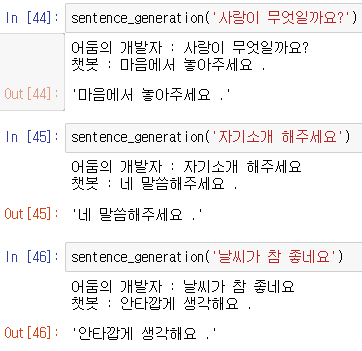

### 💎 마지막 시도 💎

- **사용한 파라미터 내역입니다.**
- **마지막 시도에서는 지금까지 튜닝했던 모든 파라미터를 활용해서 조정하여 시도했습니다!**
1. NUM_LAYERS = 2
2. D_MODEL = 256
3. NUM_HEADS = 8
4. UNITS = 512
5. DROPOUT = 0.0005
6. Adam 모델에서 learning_rate, beta_1=0.8, beta_2=0.9, epsilon=1e-9
7. EPOCHS = 50
8. target_vocab_size 크기 2의 13제곱

- 38 epoch에서 accuracy 0.1691로 Early Stop
- 예측 답변이 다소 아쉽게 나온 듯 합니다.

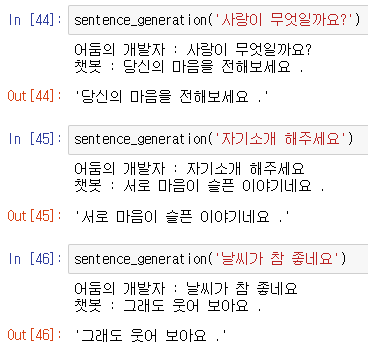

## 3. 프로젝트 회고

- 한국어 병렬 데이터를 학습 시에 **loss, accuracy는 모든 시도에서 다행히 하나의 값으로 잘 수렴**하였습니다.
- 시도 동안에 있었던 공통 질문이었던 '안녕하세요' 와 '행복했으면 좋겠어요' 질문에 대해서는 대체로 같거나 비슷한 답변이 도출되었습니다.
- 하지만 몇 번 바뀌었던 질문에 대해서는 **예측 답변이 다소 아쉬웠던 것도 많았습니다.**
- 프로젝트 3부 파트를 하면서 모델의 성능이 더 좋아지는 것을 목표로 했지만, 생각보다는 잘 되지 못한 것 같습니다.
- **챗봇이 질문에 대한 더 좋은 답변을 내기 위해서 사용할 수 있는 다른 방법이 있는지 고민해 보는 것도 좋을 것 같습니다.** Adam 이외 다른 학습 모델을 사용하는 방법을 떠올릴 수 있는데, 제출기한 상 이번 프로젝트에서는 시도하지 못한 것이 아쉽습니다.

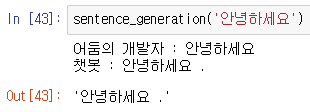

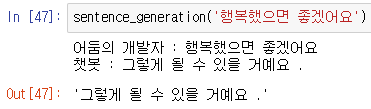